In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:

EPS = 10e-7

def versiona(x):
    return (1 - 2 * x)/ np.log((1/x) - 1)


In [53]:
def logz_old(z):
    za = np.abs(z)
    eza = np.exp(-za)
    return - np.log(za) + np.log1p(-eza + EPS) - np.log1p(eza + EPS)

def logz(z):
    za = np.abs(z)
    eza = np.exp(-za)
    return np.log1p(-eza + EPS) + np.log1p(eza + EPS) + za -np.log(za)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def invsig(x):
     return np.log(x / (1-x))
    
def dinvsig(x):
     return 1/(x-x*x)
    

/Users/Peter/anaconda/envs/pytorch4/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/Peter/anaconda/envs/pytorch4/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/Peter/anaconda/envs/pytorch4/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


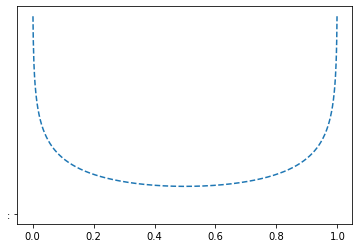

In [4]:
x = np.linspace(0, 1, 1000)

plt.plot(x, logz(invsig(x)), '--', ':');


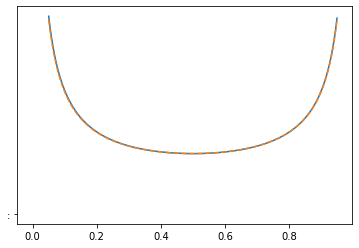

In [5]:
N = 1000

x = np.linspace(0.05, 0.95, 1000)
a = np.linspace(0.05, 0.95, 1000)[:, None]
r = np.random.rand(1, N)

y1 = a ** (-r) 
y2 = (1-a) ** -(1-r)
y = y1 * y2

res = y.mean(axis=1)

plt.plot(a, res, x, np.exp(logz(invsig(x))), '--', ':');


In [179]:
import math
eps = 10e-9
GAUSS_CONST =  0.5 * math.log(2 * math.pi)

def lsignorm(y, mus, sgs):
    lsgs = np.log(sgs)
    
    ln2 = math.log(2)
    lny = np.log(y + eps )
    ln1y = np.log(1 - y + eps )
    ms = mus/sgs
    s12 = (1/(2 * sgs))

#     return - ln2 - lny + 2.0 * ln1y + lsgs +  + s12 * mus * mus \
#             - ms * lny + ms * ln1y + s12 * (lny - ln1y) ** 2

#    return lny + ln1y + lsgs + GAUSS_CONST + (1.0/(2 * sgs * sgs)) * ( (y/(y-1)) - mus) ** 2

    x = invsig(y)
    
    d = dinvsig(y)
    
    p = 1/(sgs * np.sqrt(np.pi * 2))
    
    e = np.exp(- 0.5 * ((x - mus)/sgs) ** 2)
    
    return lny + ln1y + lsgs + GAUSS_CONST  + 0.5 * (1.0/(sgs*sgs)) * (np.log(y / (1-y)) - mus) ** 2


def signorm(y, mus, sgs):
    
    x = invsig(y)
    
    d = dinvsig(y)
    
    p = 1/(sgs * np.sqrt(np.pi * 2))
    
    e = np.exp(- 0.5 * ((x - mus)/sgs) ** 2)
    
    return d * p * e
    
    

In [181]:
mu = -3
sg = 1.5

samples = np.random.rand(1000000)
values = np.exp(-lsignorm(x, mu, sg))

values.mean()

0.9536669452523756

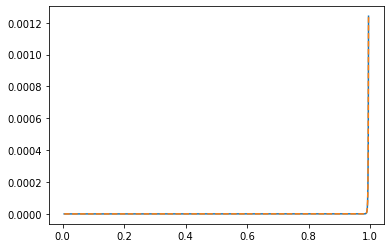

In [223]:
mu = 10
sg = 1.0

x = np.linspace(0.005, 0.995, 1000)

plt.plot(x, signorm(x, mu, sg), '-')
plt.plot(x, np.exp(-lsignorm(x, mu, sg)), '--')

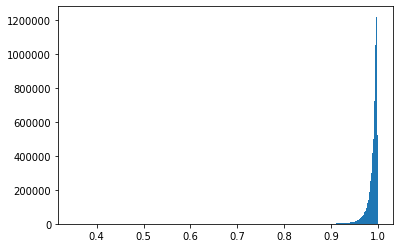

In [211]:
samples = np.random.normal(mu, sg, size=(10000000,))
samples = 1.0/(1 + np.exp(-samples))

plt.hist(samples, bins=500);

In [276]:
import math
eps = 10e-11
GAUSS_CONST =  0.5 * math.log(2 * math.pi)

def lsiglap(y, mus, sgs):
    lsgs = np.log(sgs)
    
    lny = np.log(y + eps )
    ln1y = np.log(1 - y + eps )
    

#     return - ln2 - lny + 2.0 * ln1y + lsgs +  + s12 * mus * mus \
#             - ms * lny + ms * ln1y + s12 * (lny - ln1y) ** 2

#    return lny + ln1y + lsgs + GAUSS_CONST + (1.0/(2 * sgs * sgs)) * ( (y/(y-1)) - mus) ** 2

    x = invsig(y)    
    d = dinvsig(y)

    return lny + ln1y + np.log(2) + lsgs + np.abs(x - mus) / sgs


def siglap(y, mus, bs):
    
    x = invsig(y)
    
    d = dinvsig(y)
    
    p = 1/(2 * bs)
    
    e = np.exp(- np.abs(x - mus)/bs)
    
    return d * p * e

def laplace(x, mus, bs):
        
    p = 1/(2 * bs)
    
    e = np.exp(- np.abs(x - mus)/bs)
    
    return d * p * e

In [277]:
mu = -0
sg = 1.0

samples = np.random.rand(10000000)
values = siglap(x, mu, sg)

values.mean()

1.0009509927286024

In [278]:
mu = -0
sg = 1.0

samples = np.random.rand(10000000)
values = np.exp(-lsiglap(x, mu, sg))

values.mean()

1.0009509917812385

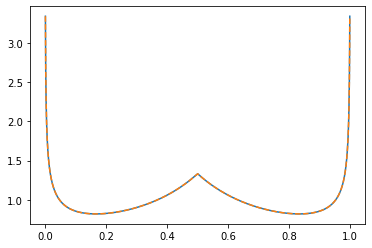

In [279]:
mu = 0
sg = 1.5

x = np.linspace(0.001, 0.999, 10000)

plt.plot(x, siglap(x, mu, sg), '-')
plt.plot(x, np.exp(-lsiglap(x, mu, sg)), '--')

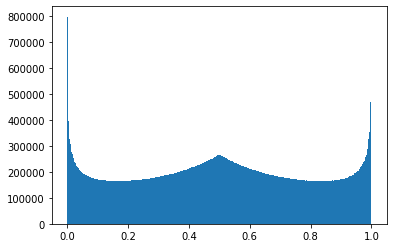

In [255]:
samples = np.random.laplace(mu, sg, size=(100000000,))
samples = 1.0/(1 + np.exp(-samples))

plt.hist(samples, bins=1000);